48
[201.5 197.3 194.5 191.0 189.2 188.2 187.2 184.4 183.2 181.6 180.5 178.1
 177.8 175.5 174.7 174.3 173.8 172.2 172.0 170.8 169.7 168.9 168.1 167.5
 167.3 167.2 166.2 166.1 165.3 163.4 163.0 163.0 161.8 161.3 159.5 157.8
 157.8 157.7 157.6 156.1 154.0 153.6 153.4 149.7 147.4 146.5 142.3 137.6]
[  3.  17.  13.  10.   8.  25.   5.  18.   4.  20.  23.  11.   2.   7.  14.
   9.  19.  21.  29.  16.  37.  34.  32.  42.  31.  15.  49.  40.  28.  27.
  30.   6.  35.  22.  24.  12.  41.  33.  44.  26.  46.  39.  43.  38.  45.
  36.  47.  48.]
Model slope: -0.69877140647
Model intercept: 143.382736271
Coefficient of Determination: 1.0
Correlation Coefficient (-0.72448259248951641, 5.8465971257267067e-09)
Death rate SD:  14.3631327827
Medicare Quality SD:  13.8533991015
Model slope: 0.480032199498
Model intercept: 13.3691862918
Coefficient of Determination: 1.0
Correlation Coefficient (0.49073801170635289, 0.00039830276761156064)
Model slope: -0.758080061629
Model intercept: 187.857314891
Coeffi

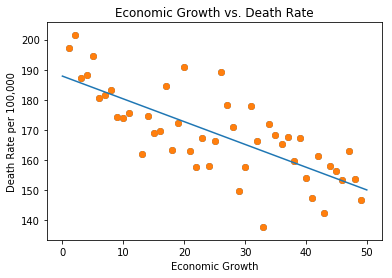

In [5]:
# coding: utf-8
# Written by Daniel Koenig and Rachel Harvill
# # Analyzing Cancer Death Statistics
# 
# First we will read in a data set that lists the death rates of the most common cancers.

# In[3]:


from pandas import DataFrame, read_csv
import matplotlib.pyplot as plt
import pandas as pd 

df = pd.read_csv('death.csv')
df = df.dropna()
df = df.drop('Lower 95% Confidence Interval', axis=1)
df = df.drop('Upper 95% Confidence Interval', axis=1)
df = df.drop('Average Annual Count', axis=1)
df = df.drop('Recent Trend', axis=1)
df = df.drop('Lower 95% Confidence Interval.1', axis=1)
df = df.drop('Upper 95% Confidence Interval.1', axis=1)
df = df.drop('Met Healthy People Objective of 161.4?', axis = 1)
df = df.drop('Recent 5-Year Trend (á) in Death Rates', axis = 1)
df = df.drop(df.index[0])
df = df.drop(df.index[51])
df = df.drop(df.index[11])


df2 =  pd.read_csv('healthCareQuality_state.csv')
df2 = df2.drop(df2.index[0])

bigdata = pd.concat([df, df2], axis=1)
bigdata = bigdata.dropna()
bigdata


# ## Run linear regression on death rate vs. medicare quality

# In[4]:


import numpy as np

deathData = bigdata['Age-Adjusted Death Rate(Ü) - deaths per 100,000']
medicareQuality = bigdata['Medicare Quality']

bigDataArray = bigdata.values

deathDataArray = bigDataArray[:,2] # returns the third columm
mqArray = bigDataArray[:,7]
mqArray = mqArray.astype(np.float)

length = len(deathDataArray)
print(length)

print(deathDataArray)
print(mqArray)


# In[5]:


def rsquared(x, y):
    """ Return R^2 where x and y are array-like."""

    slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(x, y)
    return r_value**2


# In[17]:


get_ipython().magic('matplotlib inline')
import matplotlib.pyplot as plt
import numpy as np
import statistics as stats
import scipy
from scipy.stats.stats import pearsonr

plt.scatter(deathDataArray,mqArray)

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

model = LinearRegression(fit_intercept=True)

model.fit(deathDataArray[:, np.newaxis], mqArray)

xfit = np.linspace(125,200,50)
yfit = model.predict(xfit[:, np.newaxis])


plt.scatter(deathDataArray, mqArray)
plt.xlabel('Death Rate')
plt.ylabel('Medicare Quality Rating')
plt.title('Death Rate vs. Medicare Quality')
plt.plot(xfit,yfit)
plt.savefig('drmqplot.png', dpi=300)


print("Model slope:", model.coef_[0])
print("Model intercept:", model.intercept_)
print('Coefficient of Determination:', rsquared(xfit, yfit))
print('Correlation Coefficient',pearsonr(deathDataArray, mqArray))


print('Death rate SD: ',np.std(deathDataArray))
print('Medicare Quality SD: ',np.std(mqArray))


# In[8]:


import numpy as np

df = pd.read_csv('stateEconomy.csv')
df = df.drop(df.index[17])
df = df.drop(df.index[48])
df

economicGrowth = df["Growth"].values
length = len(economicGrowth)

df


# In[15]:


get_ipython().magic('matplotlib inline')
import matplotlib.pyplot as plt
import numpy as np
import scipy
from sklearn.metrics import r2_score
from scipy import stats


plt.scatter(economicGrowth,mqArray)

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

model = LinearRegression(fit_intercept=True)

model.fit(economicGrowth[:, np.newaxis], mqArray)

xfit = np.linspace(0,50,100)
yfit = model.predict(xfit[:, np.newaxis])


plt.scatter(economicGrowth, mqArray)
plt.xlabel('Economic Growth')
plt.ylabel('Medicare Quality Rating')
plt.title('Economic Growth vs. Medicare Quality')
plt.plot(xfit,yfit)
plt.savefig('economicvmedicare.png', dpi=300)

print("Model slope:", model.coef_[0])
print("Model intercept:", model.intercept_)
print('Coefficient of Determination:', rsquared(xfit, yfit))
print('Correlation Coefficient',pearsonr(economicGrowth, mqArray))


# In[16]:


get_ipython().magic('matplotlib inline')
import matplotlib.pyplot as plt
import numpy as np
import scipy
from sklearn.metrics import r2_score
from scipy import stats


plt.scatter(economicGrowth,deathDataArray)

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

model = LinearRegression(fit_intercept=True)

model.fit(economicGrowth[:, np.newaxis], deathDataArray)

xfit = np.linspace(0,50,100)
yfit = model.predict(xfit[:, np.newaxis])


plt.scatter(economicGrowth, deathDataArray)
plt.xlabel('Economic Growth')
plt.ylabel('Death Rate per 100,000')
plt.title('Economic Growth vs. Death Rate')
plt.plot(xfit,yfit)
plt.savefig('economicvdeath.png', dpi=300)

print("Model slope:", model.coef_[0])
print("Model intercept:", model.intercept_)
print('Coefficient of Determination:', rsquared(xfit, yfit))
print('Correlation Coefficient',pearsonr(economicGrowth, deathDataArray))